In [1]:
# step51

In [2]:
%%bash
pip install cupy

    Complete output from command python setup.py egg_info:
    Options: {'package_name': 'cupy', 'long_description': None, 'wheel_libs': [], 'wheel_includes': [], 'no_rpath': False, 'profile': False, 'linetrace': False, 'annotate': False, 'no_cuda': False, 'use_hip': False}
    
    -------- Configuring Module: cuda --------
    /var/folders/gl/ylrh7tq900z21s4xnrgw738c0000gp/T/tmph0w97fgw/a.cpp:1:10: fatal error: 'cublas_v2.h' file not found
    #include <cublas_v2.h>
             ^~~~~~~~~~~~~
    1 error generated.
    command 'clang' failed with exit status 1
    
    ************************************************************
    * CuPy Configuration Summary                               *
    ************************************************************
    
    Build Environment:
      Include directories: []
      Library directories: []
      nvcc command       : (not found)
    
    Environment Variables:
      CFLAGS          : (none)
      LDFLAGS         : -L/usr/local/opt/

Command "python setup.py egg_info" failed with error code 1 in /private/var/folders/gl/ylrh7tq900z21s4xnrgw738c0000gp/T/pip-install-st0a02q2/cupy/
You are using pip version 18.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


CalledProcessError: Command 'b'pip install cupy\n'' returned non-zero exit status 1.

In [2]:
# 52.5

import time
import dezero
import dezero.functions as F
from dezero import optimizers
from dezero import DataLoader
from dezero.models import MLP


max_epoch = 5
batch_size = 100

train_set = dezero.datasets.MNIST(train=True)
train_loader = DataLoader(train_set, batch_size)
model = MLP((1000, 10))
optimizer = optimizers.SGD().setup(model)

if dezero.cuda.gpu_enable:
    train_loader.to_gpu()
    model.to_gpu()

for epoch in range(max_epoch):
    start = time.time()
    sum_loss = 0
    
    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(t)
        
    elapsed_time = time.time() - start
    print(f'epoch: {epoch+1}, loss: {round(sum_loss/len(train_set), 4)}, time: {round(elapsed_time, 4)}[sec]')

epoch: 1, loss: 1.9051, time: 4.0431[sec]
epoch: 2, loss: 1.2725, time: 4.3452[sec]
epoch: 3, loss: 0.9164, time: 4.6034[sec]
epoch: 4, loss: 0.7337, time: 4.1607[sec]
epoch: 5, loss: 0.6305, time: 4.0688[sec]


In [1]:
# step53

import time
import dezero
import dezero.functions as F
from dezero import optimizers
from dezero import DataLoader
from dezero.models import MLP
import os


max_epoch = 1
batch_size = 100

train_set = dezero.datasets.MNIST(train=True)
train_loader = DataLoader(train_set, batch_size)
model = MLP((1000, 10))
optimizer = optimizers.SGD().setup(model)

# read parameter
save_weights_path = 'my_mlp.npz'
if os.path.exists(save_weights_path):
    model.load_weights(save_weights_path)

if dezero.cuda.gpu_enable:
    train_loader.to_gpu()
    model.to_gpu()

for epoch in range(max_epoch):
    start = time.time()
    sum_loss = 0
    
    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(t)
        
    elapsed_time = time.time() - start
    print(f'epoch: {epoch+1}, loss: {round(sum_loss/len(train_set), 4)}, time: {round(elapsed_time, 4)}[sec]')
    
model.save_weights(save_weights_path)

epoch: 1, loss: 1.9269, time: 3.9427[sec]


In [11]:
# step54

import numpy as np
from dezero import test_mode
import dezero.functions as F

x = np.ones(5)
print(x)

# train
y = F.dropout(x)
print(y)

# test
with test_mode():
    y = F.dropout(x)
    print(y)

[1. 1. 1. 1. 1.]
variable([2. 0. 2. 2. 2.])
variable([1. 1. 1. 1. 1.])


In [3]:
# step55
from dezero.utils import get_conv_outsize

H, W = 4, 4 # input_shape
KH, KW = 3, 3 # kernel_shape
SH, SW = 1, 1 # stride
PH, PW = 1, 1 # padding

OH = get_conv_outsize(H, KH, SH, PH)
OW = get_conv_outsize(W, KW, SW, PW)

print(OH, OW)

4 4


In [4]:
# step56
pass

In [15]:
# step57

import numpy as np
import dezero
from dezero.utils import get_conv_outsize
import dezero.functions as F

x1 = np.arange(3*7*7).reshape(1, 3, 7, 7)
col1 = F.im2col(x1, kernel_size=5, stride=1, pad=0, to_matrix=True)
print(col1.shape)

x2 = np.random.rand(10, 3, 7, 7)
kernel_size = (5, 5)
stride = (1, 1)
pad = (0, 0)
col2 = F.im2col(x2, kernel_size, stride, pad, to_matrix=True)
print(col2.shape)

(9, 75)
(90, 75)


In [1]:
# 57.2
import numpy as np
from dezero import Variable
from dezero import functions as F

N, C, H, W = 1, 5, 15, 15
OC, (KH, KW) = 8, (3, 3)

x = Variable(np.random.randn(N, C, H, W))
W = np.random.randn(OC, C, KH, KW)
y = F.conv2d_simple(x, W, b=None, stride=1, pad=1)
y.backward()

print(y.shape)
print(x.grad.shape)

(1, 8, 15, 15)
(1, 5, 15, 15)


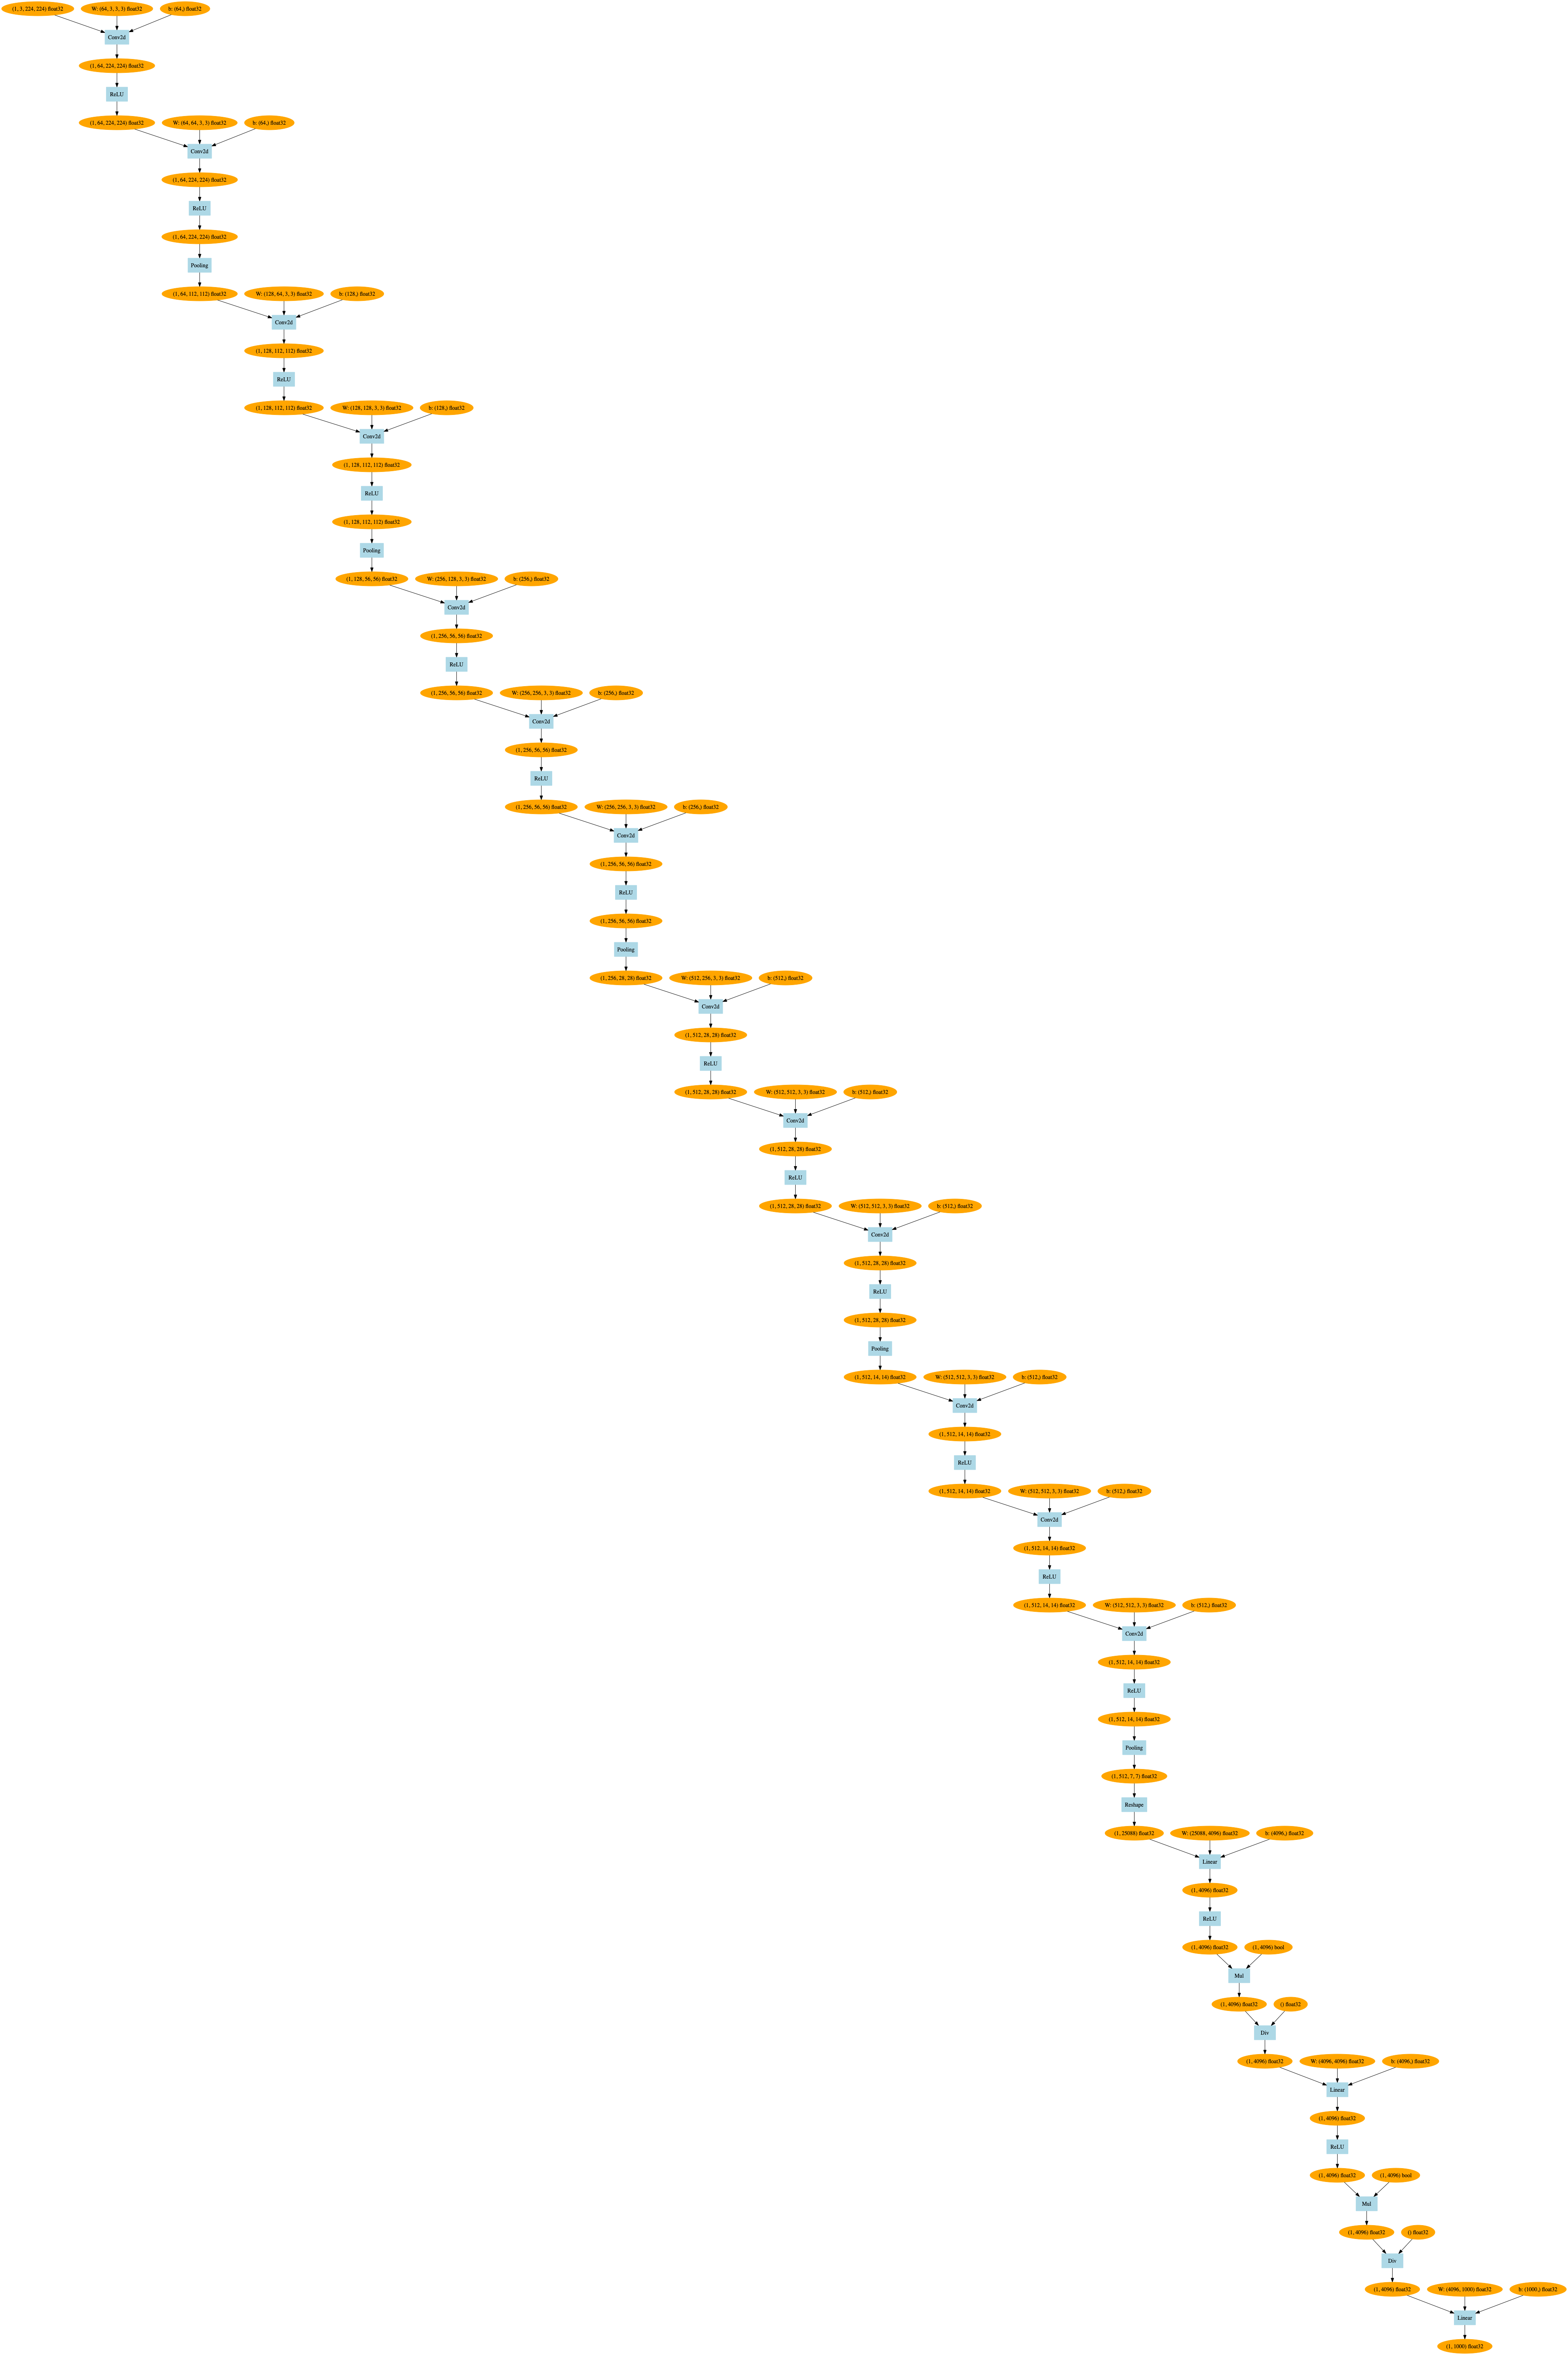

In [2]:
# step58
import numpy as np
from dezero.models import VGG16

model = VGG16(pretrained=True)

x = np.random.randn(1, 3, 224, 224).astype(np.float32)

model.plot(x)

In [3]:
# 58.3
import dezero
from PIL import Image

url = 'https://github.com/oreilly-japan/deep-learning-from-scratch-3/raw/images/zebra.jpg'

img_path = dezero.utils.get_file(url)
img = Image.open(img_path)
img.show()

Downloading: zebra.jpg
[##############################] 100.00% Done


In [6]:
from dezero.models import VGG16

x = VGG16.preprocess(img)
print(type(x), x.shape)

<class 'numpy.ndarray'> (3, 224, 224)


In [8]:
import numpy as np
from PIL import Image
import dezero
from dezero.models import VGG16

url = 'https://github.com/oreilly-japan/deep-learning-from-scratch-3/raw/images/zebra.jpg'
img_path = dezero.utils.get_file(url)
img = Image.open(img_path)
x = VGG16.preprocess(img)
x = x[np.newaxis]
model = VGG16(pretrained=True)
with dezero.test_mode():
    y = model(x)
predict_id = np.argmax(y.data)

model.plot(x, to_file='vgg.pdf')

labels = dezero.datasets.ImageNet.labels()
print(labels[predict_id])

Downloading: imagenet1000_clsidx_to_labels.txt
[##############################] 100.00% Done
zebra


In [1]:
# step59

import numpy as np
import dezero.layers as L

rnn = L.RNN(10)
x = np.random.rand(1, 1)
h = rnn(x)
print(h.shape)

(1, 10)


In [3]:
# 59.2

from dezero import Model
import dezero.functions as F
import dezero.layers as L
import numpy as np

class SimpleRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.RNN(hidden_size)
        self.fc = L.Linear(out_size)
        
    def reset_state(self):
        self.rnn.reset_state()
        
    def forward(self, x):
        h = self.rnn(x)
        y = self.fc(h)
        return y

In [4]:
seq_data = [np.random.randn(1, 1) for _ in range(1000)]
xs = seq_data[0:-1]
ts = seq_data[1:]

model = SimpleRNN(10, 1)

loss, cnt = 0, 0
for x, t in zip(xs, ts):
    y = model(x)
    loss += F.mean_squared_error(y, t)
    
    cnt += 1
    if cnt == 2:
        model.cleargrads()
        loss.backward()
        break

999
(array([-0.02031966]), array([0.01407996]))
(array([0.01407996]), array([-0.0261455]))
(array([-0.0261455]), array([0.06191]))


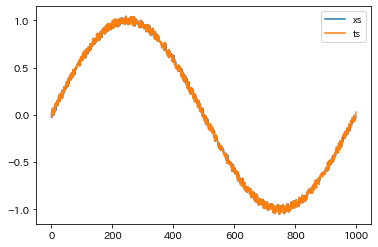

In [5]:
# 59.4

import numpy as np
import dezero
import matplotlib.pyplot as plt

train_set = dezero.datasets.SinCurve(train=True)
print(len(train_set))
print(train_set[0])
print(train_set[1])
print(train_set[2])

# plot figure
xs = [example[0] for example in train_set]
ts = [example[1] for example in train_set]

plt.plot(np.arange(len(xs)), xs, label='xs')
plt.plot(np.arange(len(ts)), ts, label='ts')
plt.legend()
plt.show()

In [12]:
# hyper parameter

import numpy as np
import matplotlib.pyplot as plt
import dezero
from dezero import Model
import dezero.functions as F
import dezero.layers as L

# Hyperparameters
max_epoch = 100
hidden_size = 100
bptt_length = 30

train_set = dezero.datasets.SinCurve(train=True)
seqlen = len(train_set)


class SimpleRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.RNN(hidden_size)
        self.fc = L.Linear(out_size)

    def reset_state(self):
        self.rnn.reset_state()

    def __call__(self, x):
        h = self.rnn(x)
        y = self.fc(h)
        return y
    
model = SimpleRNN(hidden_size, 1)
optimizer = dezero.optimizers.Adam().setup(model)

# Start training.
for epoch in range(max_epoch):
    model.reset_state()
    loss, count = 0, 0

    for x, t in train_set:
        x = x.reshape(1, 1)
        y = model(x)
        loss += F.mean_squared_error(y, t)
        count += 1

        if count % bptt_length == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizer.update()

    avg_loss = float(loss.data) / count
    print('| epoch %d | loss %f' % (epoch + 1, avg_loss))

| epoch 1 | loss 0.209169
| epoch 2 | loss 0.064396
| epoch 3 | loss 0.014215
| epoch 4 | loss 0.004850
| epoch 5 | loss 0.003637
| epoch 6 | loss 0.002615
| epoch 7 | loss 0.002641
| epoch 8 | loss 0.002266
| epoch 9 | loss 0.002718
| epoch 10 | loss 0.003381
| epoch 11 | loss 0.004675
| epoch 12 | loss 0.005253
| epoch 13 | loss 0.004347
| epoch 14 | loss 0.003828
| epoch 15 | loss 0.004180
| epoch 16 | loss 0.004808
| epoch 17 | loss 0.005158
| epoch 18 | loss 0.004922
| epoch 19 | loss 0.004720
| epoch 20 | loss 0.004578
| epoch 21 | loss 0.004525
| epoch 22 | loss 0.004524
| epoch 23 | loss 0.004516
| epoch 24 | loss 0.004476
| epoch 25 | loss 0.004415
| epoch 26 | loss 0.004358
| epoch 27 | loss 0.004321
| epoch 28 | loss 0.004306
| epoch 29 | loss 0.004307
| epoch 30 | loss 0.004317
| epoch 31 | loss 0.004335
| epoch 32 | loss 0.004362


KeyboardInterrupt: 

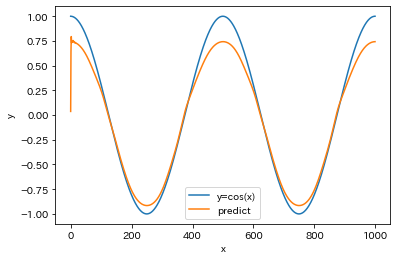

In [14]:
import matplotlib.pyplot as plt

xs = np.cos(np.linspace(0, 4 * np.pi, 1000))
model.reset_state()
pred_list = []
with dezero.no_grad():
    for x in xs:
        x = np.array(x).reshape(1, 1)
        y = model(x)
        pred_list.append(float(y.data))
        
plt.plot(np.arange(len(xs)), xs, label='y=cos(x)')
plt.plot(np.arange(len(xs)), pred_list, label='predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [2]:
# step60
import dezero
from dezero.dataloaders import SeqDataLoader

train_set = dezero.datasets.SinCurve(train=True)
dataloader = SeqDataLoader(train_set, batch_size=3)
x, t = next(dataloader)
print(x)
print('-'*30)
print(t)

[[ 0.0144868 ]
 [ 0.85346629]
 [-0.90822062]]
------------------------------
[[ 0.04052915]
 [ 0.90463628]
 [-0.84574934]]


In [1]:
 # 60.2
    
import numpy as np
import dezero
from dezero import Model
from dezero.dataloaders import SeqDataLoader
import dezero.functions as F
import dezero.layers as L

max_epoch = 100
batch_size = 30
hidden_size = 100
bptt_length = 30

train_set = dezero.datasets.SinCurve(train=True)
dataloader = SeqDataLoader(train_set, batch_size=batch_size)
seqlen = len(train_set)


class BetterRNN(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.rnn = L.LSTM(hidden_size)
        self.fc = L.Linear(out_size)

    def reset_state(self):
        self.rnn.reset_state()

    def __call__(self, x):
        y = self.rnn(x)
        y = self.fc(y)
        return y

model = BetterRNN(hidden_size, 1)
optimizer = dezero.optimizers.Adam().setup(model)

for epoch in range(max_epoch):
    model.reset_state()
    loss, count = 0, 0

    for x, t in dataloader:
        y = model(x)
        loss += F.mean_squared_error(y, t)
        count += 1

        if count % bptt_length == 0 or count == seqlen:
            model.cleargrads()
            loss.backward()
            loss.unchain_backward()
            optimizer.update()
    avg_loss = float(loss.data) / count
    print('| epoch %d | loss %f' % (epoch + 1, avg_loss))

| epoch 1 | loss 0.766490
| epoch 2 | loss 0.618086
| epoch 3 | loss 0.488579
| epoch 4 | loss 0.377397
| epoch 5 | loss 0.284103
| epoch 6 | loss 0.208227
| epoch 7 | loss 0.149183
| epoch 8 | loss 0.106190
| epoch 9 | loss 0.078149
| epoch 10 | loss 0.063484
| epoch 11 | loss 0.059979
| epoch 12 | loss 0.064680
| epoch 13 | loss 0.074018
| epoch 14 | loss 0.084286
| epoch 15 | loss 0.092405
| epoch 16 | loss 0.096554
| epoch 17 | loss 0.096274
| epoch 18 | loss 0.092108
| epoch 19 | loss 0.085142
| epoch 20 | loss 0.076611
| epoch 21 | loss 0.067652
| epoch 22 | loss 0.059166
| epoch 23 | loss 0.051772
| epoch 24 | loss 0.045814
| epoch 25 | loss 0.041401
| epoch 26 | loss 0.038460
| epoch 27 | loss 0.036793
| epoch 28 | loss 0.036128
| epoch 29 | loss 0.036165
| epoch 30 | loss 0.036610
| epoch 31 | loss 0.037202
| epoch 32 | loss 0.037730
| epoch 33 | loss 0.038041
| epoch 34 | loss 0.038046
| epoch 35 | loss 0.037711
| epoch 36 | loss 0.037054
| epoch 37 | loss 0.036127
| epoch 38

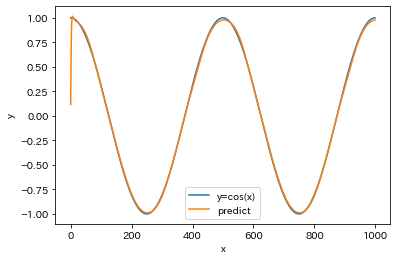

In [2]:
import matplotlib.pyplot as plt

xs = np.cos(np.linspace(0, 4 * np.pi, 1000))
model.reset_state()
pred_list = []
with dezero.no_grad():
    for x in xs:
        x = np.array(x).reshape(1, 1)
        y = model(x)
        pred_list.append(float(y.data))
        
plt.plot(np.arange(len(xs)), xs, label='y=cos(x)')
plt.plot(np.arange(len(xs)), pred_list, label='predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()